\newpage

## Question 1

- (1) Reference where you obtained the original PDF document.

Donoho, D. (n.d.). Data Science at the Singularity. Donoho (2024)_Just Accepted-11706563057147.pdf. https://assets.pubpub.org/9bk0194n/Donoho%20(2024)_Just%20Accepted-11706563057147.pdf

- (2) Read all PDF document pages and separate each line by `\n`.

In [1]:
import pdfplumber
import re

text = ''
with pdfplumber.open('Donoho (2024)_Just Accepted-11706563057147.pdf') as pdf:
    for page in pdf.pages:
        text += page.extract_text() + '\n'


text = re.sub(r'[0-9]', '', text)

print(text[:100])


Just Accepted
DOI: ./f.bef
ISSN: -
Data Science at the Singularity
d
David Donoho†,*
† Stanford Univ


- (3) Split the lines by `\n`.

In [2]:
split_text = text.split('\n')
print(split_text[:10])

['Just Accepted', 'DOI: ./f.bef', 'ISSN: -', 'Data Science at the Singularity', 'd', 'David Donoho†,*', '† Stanford University', 'e', 't', 'Abstract. Something fundamental to computation-based repsearch has really changed']


- (4) Remove the lines before `Abstract. .....`. You can print the first few lines and find the number of lines to remove.

In [3]:
remove_Abs_split_text = list(split_text[9:])
print(remove_Abs_split_text[:10])

['Abstract. Something fundamental to computation-based repsearch has really changed', 'in the last ten years. In certain fields, progress is simply dramatically more rapid than', 'previously. Researchers in affected fields are living through a period of profound trans-', 'formation, as the fields undergo a transition to fricetionless reproducibility (FR). This', 'transition markedly changes the rate of spread of ideas and practices, affects scientific', 'mindsets and the goals of science, and erases memories of much that came before.', 'TheemergenceofFRflowsfromdatasccienceprinciplesthatmaturedtogetherafter', 'decadesofworkbymanytechnologistsandnumerousresearchcommunities. Themature', 'principlesinvolvedatasharing,codesharing,andcompetitivechallenges,howeverimple-', 'c']


- (5) Create a data frame with lines.

In [4]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk

donoho_paper = pd.DataFrame({'line': remove_Abs_split_text})
donoho_paper

E:\conda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,line
0,Abstract. Something fundamental to computation...
1,"in the last ten years. In certain fields, prog..."
2,previously. Researchers in affected fields are...
3,"formation, as the fields undergo a transition ..."
4,transition markedly changes the rate of spread...
...,...
1667,t
1668,s
1669,u
1670,J


- (6) Tokenize each line and convert each word to a row.

In [5]:
donoho_paper['word'] = donoho_paper['line'].apply(word_tokenize)
donoho_paper = donoho_paper.explode('word')
donoho_paper.shape

(18754, 2)

- (7) Convert each word to lowercase.

In [6]:
donoho_paper['word'] = donoho_paper['word'].str.lower()
donoho_paper

,line,word
0,Abstract. Something fundamental to computation...,abstract
0,Abstract. Something fundamental to computation...,.
0,Abstract. Something fundamental to computation...,something
0,Abstract. Something fundamental to computation...,fundamental
0,Abstract. Something fundamental to computation...,to
...,...,...
1667,t,t
1668,s,s
1669,u,u
1670,J,j


- (8) Remove stopwords.

In [7]:
from nltk.corpus import stopwords

english_stopwords = set(stopwords.words('english'))
donoho_paper = donoho_paper[~donoho_paper['word'].isin(english_stopwords)]

donoho_paper = donoho_paper[~donoho_paper['word'].str.replace("'", "").isin(english_stopwords)]


donoho_paper.shape


(13731, 2)

- (9) Remove any other words that are not suitable for the word cloud. For example, a single letter word, symbols [ . , ) , abbreviation, etc.

In [8]:
donoho_paper['word'] = donoho_paper['word'].str.replace(r'[.,):(•-]', '', regex=True)
donoho_paper['word'] = donoho_paper['word'].str.replace(r'^.$', '', regex=True)
donoho_paper['word'] = donoho_paper['word'].str.replace(r'^fr$', '', regex=True)
donoho_paper['word'] = donoho_paper['word'].str.replace(r'^https$', '', regex=True)
donoho_paper = donoho_paper[donoho_paper['word'] != '']

donoho_paper.shape


(8823, 2)

- (10) Create a term-frequency data frame.

In [9]:
freq = donoho_paper['word'].value_counts().reset_index()
freq.columns = ['word', 'n']
print(freq.head(10))
print(freq.shape)

              word    n
0             data  120
1         research  110
2          science   70
3              new   63
4       challenges   52
5             many   50
6             code   48
7     frictionless   46
8          sharing   36
9  reproducibility   36
(3861, 2)


- (11) Produce a word cloud. You can decide on the most frequently used words in the world cloud—for example, word cloud for the ten most frequently used words.

In [10]:
freq = freq.sort_values(
    by='n',
    ascending=False
    )
freq.head(10)



,word,n
0,data,120
1,research,110
2,science,70
3,new,63
4,challenges,52
5,many,50
6,code,48
7,frictionless,46
8,sharing,36
9,reproducibility,36


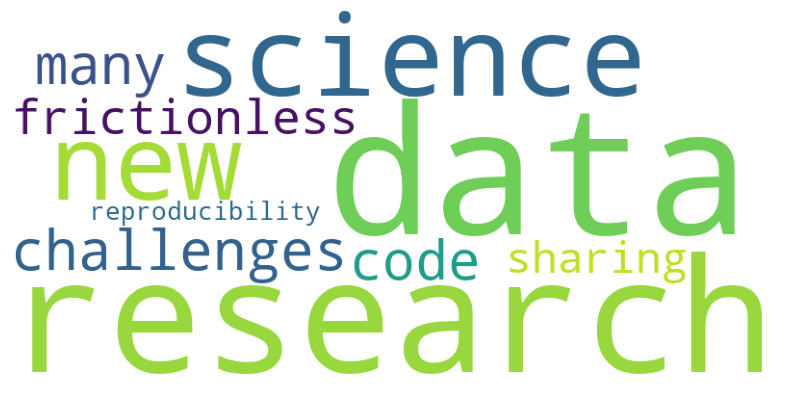

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq = dict(
    zip(
        freq.head(10)['word'],
        freq.head(10)['n']
        )
    )

wordcloud = WordCloud(width=800, height=400, background_color='white')
# word cloud
wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- (12) Write a summary paragraph (at least two statements) about your word cloud. The summary should be cast in the context of your chosen text document.

It's obvious see that the top three most frequent words are `data`,`research`,`science`. We easily identify the main idea of the article by reading this word cloud.

\newpage

## Question 2

uses Johns Hopkins GitHub data on the COVID-19 global vaccine administered to develop a Shiny App.

- (1) Read the CSV file of [https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv](https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv) into Python. Read the data dictionary at [https://github.com/govex/COVID-19/blob/master/data_tables/vaccine_data/global_data/data_dictionary.csv](https://github.com/govex/COVID-19/blob/master/data_tables/vaccine_data/global_data/data_dictionary.csv).

In [13]:
covid19_vaccine = pd.read_csv("https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv")
covid19_vaccine.info

<bound method DataFrame.info of               Date    UID  Province_State      Country_Region   Doses_admin  \
0       2020-12-29   40.0             NaN             Austria  2.123000e+03   
1       2020-12-29   48.0             NaN             Bahrain  5.501400e+04   
2       2020-12-29  112.0             NaN             Belarus  0.000000e+00   
3       2020-12-29   56.0             NaN             Belgium  3.400000e+02   
4       2020-12-29  124.0             NaN              Canada  5.907900e+04   
...            ...    ...             ...                 ...           ...   
142592  2023-03-09  275.0             NaN  West Bank and Gaza  3.748571e+06   
142593  2023-03-09    NaN             NaN               World  1.335626e+10   
142594  2023-03-09  887.0             NaN               Yemen  1.256288e+06   
142595  2023-03-09  894.0             NaN              Zambia  1.361498e+07   
142596  2023-03-09  716.0             NaN            Zimbabwe  1.269485e+07   

        People_at_l

- (2) Each row is uniquely defined by country and date in the data frame. What is the dimension of the data?

In [14]:
covid19_vaccine.shape

(142597, 6)

The dimension of the dataframe is 142597 rows and 2 columns

- (3) Look at the data dictionary. Describe the `Doses_admin` and `People at least one dose administered` variables.

`Doses_admin` means Cumulative number of doses administered. When a vaccine requires multiple doses, each one is counted independently. `People at least one dose administered` mean Cumulative number of people who received at least one vaccine dose. When the person receives a prescribed second dose, it is not counted twice


- (4) Identify the data frame column representing the countries. Then, select the rows in the data frame for Canada.

In [16]:
canada_covid_data = covid19_vaccine[covid19_vaccine['Country_Region'] == 'Canada']
canada_covid_data

,Date,UID,Province_State,Country_Region,Doses_admin,People_at_least_one_dose
4,2020-12-29,124.0,NaN,Canada,59079.0,59078.0
40,2020-12-30,124.0,NaN,Canada,72092.0,72090.0
76,2020-12-31,124.0,NaN,Canada,80641.0,80639.0
116,2021-01-01,124.0,NaN,Canada,96170.0,96168.0
156,2021-01-02,124.0,NaN,Canada,105461.0,105458.0
...,...,...,...,...,...,...
141654,2023-03-05,124.0,NaN,Canada,96956502.0,34763194.0
141849,2023-03-06,124.0,NaN,Canada,96956502.0,34763194.0
142044,2023-03-07,124.0,NaN,Canada,96956502.0,34763194.0
142239,2023-03-08,124.0,NaN,Canada,96956502.0,34763194.0


- (5) Use only the Canada vaccine data to answer the rest of the questions. Plot the time series data of `Dose_dmin` and `People_at_least_one_dose` in the same graph. Label the time series lines by `Doses Administered` and `People at least one dose administered`, respectively. Convert the y-axis to the log scale. Rotate the x-axis ticks by 45 degrees.

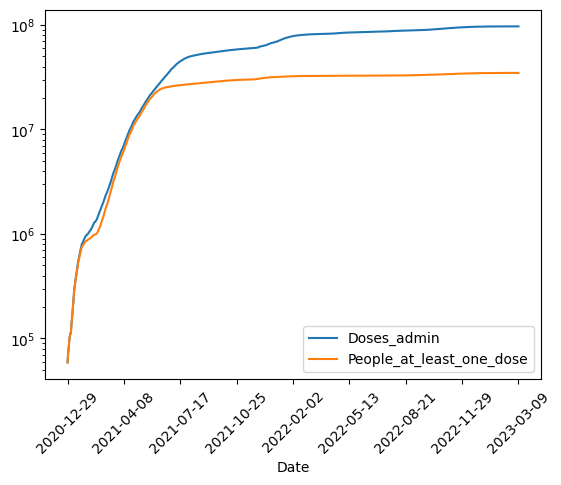

In [33]:
plt.plot(canada_covid_data['Date'], canada_covid_data['Doses_admin'],label='Doses_admin')
plt.plot(canada_covid_data['Date'], canada_covid_data['People_at_least_one_dose'],label='People_at_least_one_dose')


plt.yscale("log")
plt.xticks(canada_covid_data.Date[::100],rotation=45)
plt.xlabel("Date")
plt.legend(loc="lower right")

plt.show()


- (6) Describe the plot in the context of data.

During time 2020-12-29 to 2021-07-17 both Doses_admin and People_at_least_one_dose increase in a very similar rate, which implies many people are taking their first doses right away while the doses are being administered.


- (7) Create the Shiny app as follows. In the Shiny app, the user input is any starting and ending dates. The range of dates may be `2020-12-29` to `2023-03-09`. The output is the time series plot for the logarithm of the `doses administrated` and `people at least one dose administrated` in Canada for the range of dates the users choose. You can use the following template to create the Shiny app.

In [20]:
#| eval:false

from shiny import App, render, ui


import pandas as pd
import matplotlib.pyplot as plt
app_ui = ui.page_fluid(
    ui.h1("COVID-19 Vaccination in Canada"),
    ui.input_date_range(
        "daterange",
        "Date range: (Choose a date range)",
        start="2020-12-29",
        end= '2023-03-09'
        ),
    ui.output_plot('myplot'),
)

def server(input, output, session):
    @output
    @render.plot
    def myplot():


        covid19_vaccine = pd.read_csv("https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv")
        canada_covid_data = covid19_vaccine[covid19_vaccine['Country_Region'] == 'Canada']
        canada_covid_data['Date'] = pd.to_datetime(canada_covid_data['Date'])

        df = canada_covid_data


        df = df[df['Date'] > pd.Timestamp(input.daterange()[0])]
        df = df[df['Date'] < pd.Timestamp(input.daterange()[1])]

        plt.plot(df['Date'], df['Doses_admin'],label='Doses_admin')
        plt.plot(df['Date'], df['People_at_least_one_dose'],label='People_at_least_one_dose')
        plt.yscale("log")
        plt.xticks(rotation=45)
        plt.legend(loc="lower right")

app = App(app_ui, server)

'0.7.1'

- (8) Deploy your Shiny app at [https://www.shinyapps.io/](https://www.shinyapps.io/). Then, provide the link to the app.

 [https://haoyuanchen.shinyapps.io/3da3_a2_v1/](https://haoyuanchen.shinyapps.io/3da3_a2_v1/)